# Week4 Simple Linear Regression
## 背景描述
考虑一个公司销售和维修小型计算机的案例：为了研究**维修服务时长**和**电脑中必须修理或更换的电子元件数量**之间的关系，收集了服务调用记录的样本。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Units | 修复的组件数量 | discrete variable | $\mathbb{Z}^+$ |
| （因变量）Minutes | 维修服务时长 | continuous variable(单位: 分钟) | $\mathbb{R}$ |



In [37]:
import pandas as pd
print('Data: \n', pd.read_csv('Computer_repair.csv').values)

Data: 
 [[  1   1  23]
 [  2   2  29]
 [  3   3  49]
 [  4   4  64]
 [  5   4  74]
 [  6   5  87]
 [  7   6  96]
 [  8   6  97]
 [  9   7 109]
 [ 10   8 119]
 [ 11   9 149]
 [ 12   9 145]
 [ 13  10 154]
 [ 14  10 166]]


## 问题
这里使用 $\alpha=0.05$ 的水平
1. 请用统计模型描述维修服务时长与组件个数的关系.
2. 请问 Q1 中所建立的模型是否合理.
3. 如果一个客户需要维修 3 个组件，请给出一个合理区间，告知客户其可能需要的维修服务时长.

## 解决方案

**Q1:**  
列出线性模型为：$Minutes = \beta_0 + \beta_1*Units + \epsilon$

In [2]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
n = 14

x = pd.read_csv('Computer_repair.csv')
data = x.values[:,1:3]
df = pd.DataFrame(data, columns = ['Units', 'Minutes'])
print(df.head())
print('\n')
print(np.var(data[:,0]))

# Do the simple linear regression
model = ols('Minutes ~ Units', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
model.summary()


   Units  Minutes
0      1       23
1      2       29
2      3       49
3      4       64
4      4       74


8.142857142857142
参数估计值: 
 Intercept     4.1617
Units        15.5088
dtype: float64


D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           8.92e-13
Time:                        16:54:25   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Minutes_hat = 4.1617 + 15.5088 * Units


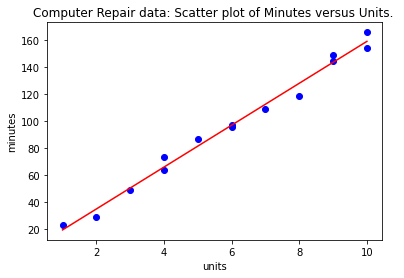

In [3]:
# 输出一元线性回归方程
print('Minutes_hat =', round(beta[0], 4), '+', round(beta[1], 4), '* Units')

# 画图
x = data[:, 0]
y = data[:, 1]
Y = model.fittedvalues   # 预测值
plt.scatter(x, y, c = 'blue', label='Minutes') # 原始数据
plt.plot(x, Y, 'red', label='Fit_minutes') # 拟合数据
plt.title('Computer Repair data: Scatter plot of Minutes versus Units. ')
plt.xlabel('units')
plt.ylabel('minutes')
plt.show()

由此可知，该线性回归模型为：$Minutes = 4.162 + 15.509 * Units$

**Q2:**  
检验假设：$H_0: \beta_1=0$ vs $H_1: \beta_1 \neq 0$

In [4]:
# 求解相关项
print(data[0])
x_mean = np.mean(data[0])  # 自变量 x 的均值
y_mean = np.mean(data[1])  # 因变量 y 的均值
sigma2 = sum((y - beta[0] - beta[1] * x) ** 2) / (n - 2)  # 方差
sigma = np.sqrt(sigma2)  # 标准差
lxx = sum((x - np.mean(x)) ** 2)  # 求l_xx
lyy = sum((y - np.mean(y)) ** 2)  # 求l_yy
lxy = sum((x - np.mean(x)) * (y - np.mean(y)))  # 求l_xy

[ 1 23]


**一元线性模型的显著性检验——F 检验:**

In [5]:
# F检验
anova_results = round(anova_lm(model), 2)
print('The ANOVA table: \n', anova_results)

# 法1：
pVal1 = anova_results['PR(>F)'][0]
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F0 = anova_results['F'][0]
F = round(f.ppf(1 - alpha, dfn = 1,dfd = n - 2), 2)
if F0 > F:
    print('Since F0 > F(0.95, 1, 12) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

The ANOVA table: 
             df    sum_sq   mean_sq      F  PR(>F)
Units      1.0  27419.51  27419.51  943.2     0.0
Residual  12.0    348.85     29.07    NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 1, 12) =  4.75 , reject H0.


**一元线性模型的显著性检验——t 检验:**

In [6]:
# t检验
t0 = beta[1] * np.sqrt(lxx) / sigma  # 求t值
print('t0值为：', round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - 2)  # 分位点函数（CDF的逆）
print('t的临界值为：', round(tVal, 4))
pVal2 = t.sf(t0, n - 2)  # 用残存函数（1-CDF）求p值 
# pVal2 = 1 - t.cdf(t0, n - 2)
print('P值为：', round(pVal2, 4))

# 法1：
if pVal2 < alpha:
    print ('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.')
    
# 法2：
if abs(t0) > tVal:
    print('Since t0 > t(0.975,12) = ', round(tVal, 4), ', reject H0.')
else:
    print('Accept H0.') 

t0值为： 30.7116
t的临界值为： 2.1788
P值为： 0.0

Since p-value < 0.05, reject H0.
Since t0 > t(0.975,12) =  2.1788 , reject H0.


**相关系数的检验:**  
检验假设：$H_0: \rho=0$ vs $H_1: \rho \neq 0$

In [7]:
# 相关系数检验
# 法1：代公式求得
r1 = lxy / np.sqrt(lxx * lyy)
print('法 1 求得的相关系数：', round(r1, 4))

# 法2：用pandas中DataFrame对象corr()方法
r2 = df.corr()
print('法 2 求得的相关系数：\n', round(r2, 4))

rVal = np.sqrt(F / (F + (n - 2)))
if abs(r1) > rVal:
    print ('\nSince r > r(0.975, 12) = ', round(rVal, 4), ', reject H0.')
else:
    print('\nAccept H0.')


法 1 求得的相关系数： 0.9937
法 2 求得的相关系数：
           Units  Minutes
Units    1.0000   0.9937
Minutes  0.9937   1.0000

Since r > r(0.975, 12) =  0.5325 , reject H0.


由此可知，Q1中所建立的模型是合理的。

**残差分析0: 计算维修服务时长的残差**

In [8]:
# 计算维修服务时长的残差
data_res = data * 1.0
for i in range(n):
    data_res[:,1] = y - Y
df = pd.DataFrame(data_res, columns = ['Units', 'Minutes_res'])
print(df.head())

   Units  Minutes_res
0    1.0     3.329574
1    2.0    -6.179198
2    3.0    -1.687970
3    4.0    -2.196742
4    4.0     7.803258


**残差分析1: 残差的正态概率图** 

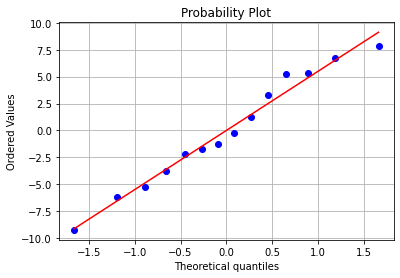

In [9]:
# 残差的正态概率图
res = data_res[:, 1]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
plt.grid()
plt.show()

**残差分析2: 残差与拟合值的关系图**  

Text(0, 0.5, 'e_i')

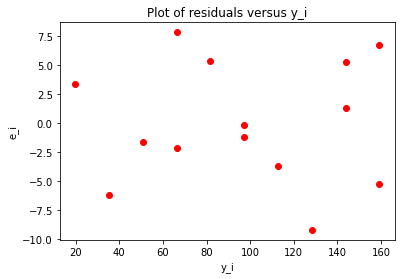

In [13]:
# 残差与预测值的关系图
plt.scatter(Y, res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

**Q3:**

**关于 $E(y_0)$ 的估计:**

In [11]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta0 = tVal * sigma * np.sqrt(1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = input()
print('给定 x = %d, E(y_0) 的置信区间：'%int(x0), np.round(confidence_interval(x0), 4))

3
给定 x = 3, E(y_0) 的置信区间： [40.2998 61.0761]


**关于 $y_0$ 的预测:**

In [12]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta1 = tVal * sigma * np.sqrt(1 + 1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x00 = input()
print('给定 x = %d, y_0 的预测区间：'%int(x00), np.round(confidence_interval(x0), 4))

3
给定 x = 3, y_0 的预测区间： [35.0062 66.3698]


## 第四周练习题
数据集：Project4.csv(内附文档)  
统计方法：Simple Linear Regression   
软件：Jupyter Notebook  
作业发到邮箱：51205903029@stu.ecnu.edu.cn  
压缩包名字：学号-姓名  
Deadline：下周一晚上10：00之前交  
注：要有完整的解题过程，不能只有代码